# Introduction


 # Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve#

# Load Data

### Data Attributes
This Dataset sourced by some unnamed institute.

Feature Explanation:


<mark>distance_from_home</mark> - the distance from home where the transaction happened.

<mark>distance_from_last_transaction</mark> - the distance from last transaction happened.

<mark>ratio_to_median_purchase_price</mark> - Ratio of purchased price transaction to median purchase price.

<mark>repeat_retailer</mark> - Is the transaction happened from same retailer.

<mark>used_chip</mark> - Is the transaction through chip (credit card).

<mark>used_pin_number</mark> - Is the transaction happened by using PIN number.

<mark>online_order</mark> - Is the transaction an online order.

<mark>fraud</mark> - Is the transaction fraudulent.

In [4]:
# Load the dataset
df = pd.read_csv("../../data/card_transdata.csv")

# Data Prev
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Explore Data

We want a quick peek of our data summary

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Quick look at some of the features and their distribution

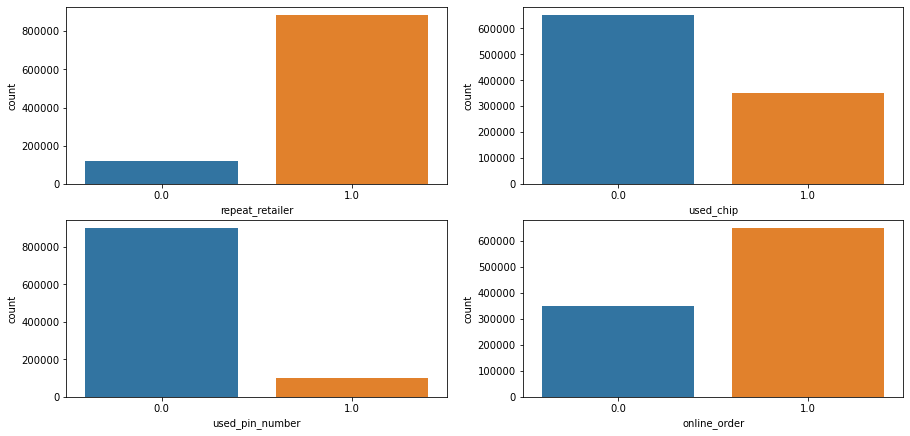

In [6]:
plt.figure(figsize=(15, 15))

plt.subplot(4,2,1)
sns.countplot(x = 'repeat_retailer', data = df)
plt.subplot(4,2,2)
sns.countplot(x = 'used_chip', data = df)
plt.subplot(4,2,3)
sns.countplot(x = 'used_pin_number', data = df)
plt.subplot(4,2,4)
sns.countplot(x = 'online_order', data = df)
plt.show()

Let's take a quick look at our target variable 'fraud' and the counts between 1 & 0

Raw counts: 

0.0    912597
1.0     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


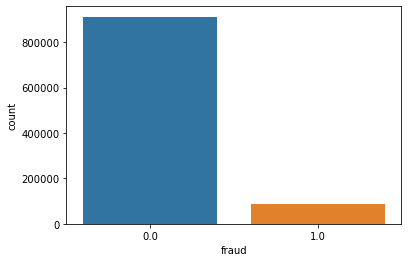

In [22]:
print('Raw counts: \n')
print(df['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['fraud'].value_counts(normalize=True))
ax=sns.countplot (x=df['fraud'], data=df)

Let's take a look at the pairwise relationships between variables in our data set.

We will witness that strong positive or negative relationships between variables does not occur in this heatmap

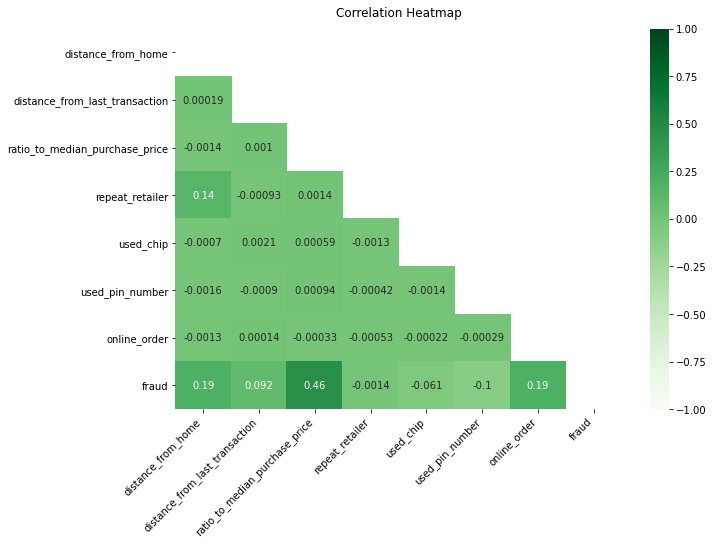

In [25]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens', mask=mask)

# Rotate the x-label for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()

# Preprocess Data


In [ ]:
# Split the data into features (X) and the target variable (y)
X = df.drop("fraud", axis=1)
y = df["fraud"]

In [ ]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data is imbalanced
more than 91% of data are Genuine transactions
more than 8% of data are Fraud transactions

Accuracy is a not a good metric for imbalance data set. It won't provide a great picture for the model's overall performance. In imbalanced data sets, the model can predict the majority class and achieve a high score. Aka it's seen more of the majority class and it will simply predict that, in this case it can predict genuine 100% and will be correct 91% of the time. However, it ignore approximately 9% of the time and that 9% is very significant because those are false negative which can cost a lot of money to the firm. 

Example: a fraud transaction is called genuine, where the transaction withdraw $50 dollars from a random bank customer. Not only did the customer lose 50 bucks, it also lost the trust to the bank. This is a lost lost situation. Imagine a bigger number, let's say 1 million. How would you feel?

# Models

Create a baseline model using logistic regression to get a baseline score

In [ ]:
lr_model = LogisticRegression().fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
y_score = lr_model.predict_proba(X_test)[:, 1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
#print("F1 Score:", f1_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(auc(fpr, tpr))

# Over Sampling & Under Sampling

In [ ]:
# we need to use smote
# over sample

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

In [ ]:

    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    print("auc", auc(fpr, tpr))
    print("Accuracy:", accuracy_score(y_test, y_hat_test))
    print("Precision:", precision_score(y_test, y_hat_test))
    print("Recall:", recall_score(y_test, y_hat_test))
    print("F1 Score:", f1_score(y_test, y_hat_test))

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

In [ ]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_holdout)

    y_score = logreg.decision_function(X_holdout)
    #fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_trainy_holdout_resampled).value_counts()) 
    print("auc", auc(fpr, tpr))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
# Split the original data into training and holdout test sets
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

# Use the best model for prediction on the holdout test set
y_pred_holdout = model_log.predict(X_test)
 

In [ ]:
accuracy_holdout = accuracy_score(y_test, y_pred_holdout)
print(f"Accuracy: {accuracy_holdout}")

In [ ]:
precision_holdout = precision_score(y_holdout, y_pred_holdout)
recall_holdout = recall_score(y_holdout, y_pred_holdout)
print(f"Precision: {precision_holdout}")
print(f"Recall: {recall_holdout}")

In [ ]:
# Evaluate the best model on the holdout test set
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
precision_holdout = precision_score(y_holdout, y_pred_holdout)
recall_holdout = recall_score(y_holdout, y_pred_holdout)
f1_holdout = f1_score(y_holdout, y_pred_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, y_pred_holdout)
 
# Display metrics for the best model on the holdout test set
print("Holdout Test Set Metrics:")
print(f"Accuracy: {accuracy_holdout}")
print(f"Precision: {precision_holdout}")
print(f"Recall: {recall_holdout}")
print(f"F1 Score: {f1_holdout}")
print(f"ROC AUC: {roc_auc_holdout}")

In [ ]:
oberservation

In [ ]:
chose lR for running time.

tried smote 
and did not result in big performance changes



In [ ]:
rf

# `

# conclusion and 

In [ ]:
imports
data
eda
models
LR (base model)(non resampled)
LR(resampled data)(not tuned)

RF(base model) (non resampled data)
RF ( resampled data)(not tuned)
RF (resampled data)( hyper parameterized)

RF (hold out)

In [ ]:
--CREATE OR REPLACE VIEW "test_view_2" AS 
WITH table1 AS (
    SELECT timestamp as timestamp1 FROM aws_cloudtrail LIMIT 5
),
table2 AS (
    SELECT timestamp as timestamp2 FROM aws_os_win_security LIMIT 5
)
SELECT *
FROM 
  table1
  LEFT JOIN
  table2
  ON table1.timestamp1 = table2.timestamp2 

In [30]:
the boy who cried wolf

SyntaxError: invalid syntax (<ipython-input-30-40c6161d4bfd>, line 1)

the boy who cried wolf: false positive(wolf not there, but said it was) draw backs is that is that people won't trust you anymore when you sound the alarm


if the boy said (no wolf, but there is a wolf ) this is a false negative..